### Importing Dependencies

In [ ]:
import os
import pandas as pd
import glob
import warnings


In [ ]:
#pip install nltk

In [ ]:
warnings.filterwarnings('ignore')


In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
import nltk


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [ ]:
# Download the stopwords from NLTK
nltk.download('stopwords')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

## Loading Dataset


In [ ]:
def load_data(data_dir):
    reviews = []
    labels = []
    for label_type in ['pos', 'neg']:
        dir_name = os.path.join(data_dir, label_type)
        for file in os.listdir(dir_name):
            with open(os.path.join(dir_name, file), 'r', encoding='utf-8') as f:
                reviews.append(f.read())
            labels.append(1 if label_type == 'pos' else 0)
    return reviews, labels

# Load train and test data
train_reviews, train_labels = load_data('D:\\Mtech\\SEm_1\\Predictive_Data_Analysis\\Lab_Task_7\\aclImdb\\train')





In [ ]:
test_reviews, test_labels = load_data('D:\\Mtech\\SEm_1\\Predictive_Data_Analysis\\Lab_Task_7\\aclImdb\\test')

In [ ]:
# Convert to DataFrame
train_data = pd.DataFrame({'review': train_reviews, 'label': train_labels})
test_data = pd.DataFrame({'review': test_reviews, 'label': test_labels})

In [ ]:
train_data.tail(20)

,review,label
24980,It was a Sunday night and I was waiting for th...,0
24981,Have I ever seen a film more shockingly inept?...,0
24982,The next time you are at a party and someone a...,0
24983,"Turgid dialogue, feeble characterization - Har...",0
24984,Cameron Diaz is a woman who is married to a ju...,0
24985,I had the misfortune to watch this rubbish on ...,0
24986,It's pretty bad when the generic movie synopsi...,0
24987,Having watched this movie on the SciFi channel...,0
24988,"First off, I'm not here to dog this movie. I f...",0
24989,"Ah yez, the Sci Fi Channel produces Yeti anoth...",0


In [ ]:
test_data.tail(20)

,review,label
24980,Although its plot is taken from the history of...,0
24981,I found the movie at my local video store and ...,0
24982,"As an ancient movie fan, I had heard much abou...",0
24983,Incomprehensibly dreadful mishmash of the prob...,0
24984,I'm currently slogging through Gibbon's 'Fall ...,0
24985,It's a rare sensation to come across a film so...,0
24986,Starting with a tearjerking poem and images of...,0
24987,I saw this film at the tender age of 18 with a...,0
24988,It's rare to see film that strikes out in ever...,0
24989,"Some describe CALIGULIA as ""the"" most controve...",0


In [ ]:
data = pd.concat([train_data, test_data])

In [ ]:
# Initialize the set of English stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)

    return cleaned_text


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
data['cleaned_review'] = data['review'].apply(clean_text)

# Display the first few rows to verify
print(data[['review', 'cleaned_review']].head())


                                              review  \
0  Bromwell High is a cartoon comedy. It ran at t...   
1  Homelessness (or Houselessness as George Carli...   
2  Brilliant over-acting by Lesley Ann Warren. Be...   
3  This is easily the most underrated film inn th...   
4  This is not the typical Mel Brooks film. It wa...   

                                      cleaned_review  
0  bromwell high cartoon comedy ran time programs...  
1  homelessness houselessness george carlin state...  
2  brilliant overacting lesley ann warren best dr...  
3  easily underrated film inn brooks cannon sure ...  
4  typical mel brooks film much less slapstick mo...  


In [ ]:

max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned_review'])



In [ ]:
data_sequences = tokenizer.texts_to_sequences(data['cleaned_review'])


data_padded = pad_sequences(data_sequences, maxlen=max_len, padding='post', truncating='post')



In [ ]:
data['tokenized'] = data_sequences
data['padded'] = list(data_padded)




In [ ]:
print(data[['cleaned_review', 'tokenized', 'padded']].head())

                                      cleaned_review  \
0  bromwell high cartoon comedy ran time programs...   
1  homelessness houselessness george carlin state...   
2  brilliant overacting lesley ann warren best dr...   
3  easily underrated film inn brooks cannon sure ...   
4  typical mel brooks film much less slapstick mo...   

                                           tokenized  \
0  [1, 213, 930, 116, 1881, 9, 5768, 267, 43, 447...   
1  [1, 1, 611, 1, 3259, 1653, 62, 35, 1146, 228, ...   
2  [395, 3578, 1, 2098, 4536, 40, 838, 1, 672, 44...   
3  [591, 1826, 3, 1, 2436, 4695, 148, 2699, 98, 6...   
4  [643, 3182, 2436, 3, 13, 234, 2094, 22, 63, 38...   

                                              padded  
0  [1, 213, 930, 116, 1881, 9, 5768, 267, 43, 447...  
1  [1, 1, 611, 1, 3259, 1653, 62, 35, 1146, 228, ...  
2  [395, 3578, 1, 2098, 4536, 40, 838, 1, 672, 44...  
3  [591, 1826, 3, 1, 2436, 4695, 148, 2699, 98, 6...  
4  [643, 3182, 2436, 3, 13, 234, 2094, 22, 63, 38..

In [ ]:
data.head()

,review,label,cleaned_review,tokenized,padded
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high cartoon comedy ran time programs...,"[1, 213, 930, 116, 1881, 9, 5768, 267, 43, 447...","[1, 213, 930, 116, 1881, 9, 5768, 267, 43, 447..."
1,Homelessness (or Houselessness as George Carli...,1,homelessness houselessness george carlin state...,"[1, 1, 611, 1, 3259, 1653, 62, 35, 1146, 228, ...","[1, 1, 611, 1, 3259, 1653, 62, 35, 1146, 228, ..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,brilliant overacting lesley ann warren best dr...,"[395, 3578, 1, 2098, 4536, 40, 838, 1, 672, 44...","[395, 3578, 1, 2098, 4536, 40, 838, 1, 672, 44..."
3,This is easily the most underrated film inn th...,1,easily underrated film inn brooks cannon sure ...,"[591, 1826, 3, 1, 2436, 4695, 148, 2699, 98, 6...","[591, 1826, 3, 1, 2436, 4695, 148, 2699, 98, 6..."
4,This is not the typical Mel Brooks film. It wa...,1,typical mel brooks film much less slapstick mo...,"[643, 3182, 2436, 3, 13, 234, 2094, 22, 63, 38...","[643, 3182, 2436, 3, 13, 234, 2094, 22, 63, 38..."


In [ ]:
# Features and labels
X = data_padded
y = data['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (40000, 200)
Testing Features Shape: (10000, 200)
Training Labels Shape: (40000,)
Testing Labels Shape: (10000,)


In [ ]:

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define training parameters
batch_size = 32  # Batch size for training
epochs = 10      # Number of epochs for training

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Reserve 20% of the training data for validation
    batch_size=batch_size,
    epochs=epochs,
    verbose=1  # Displays progress during training
)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 97s 95ms/step - accuracy: 0.5136 - loss: 0.6926 - val_accuracy: 0.6565 - val_loss: 0.6443
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 95s 95ms/step - accuracy: 0.6283 - loss: 0.6469 - val_accuracy: 0.5174 - val_loss: 0.6892
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 92s 92ms/step - accuracy: 0.6121 - loss: 0.6131 - val_accuracy: 0.8449 - val_loss: 0.3743
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - accuracy: 0.8829 - loss: 0.2943 - val_accuracy: 0.8737 - val_loss: 0.3030
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - accuracy: 0.9277 - loss: 0.1997 - val_accuracy: 0.8780 - val_loss: 0.3080
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - accuracy: 0.9514 - loss: 0.1436 - val_accuracy: 0.8764 - val_loss: 0.3441
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 91s 91ms/step - accuracy: 0.9679 - loss: 0.1007 - val_accuracy: 0.8734 - val_loss: 0.3910
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 92s 92ms/step - accuracy: 0.9802 -

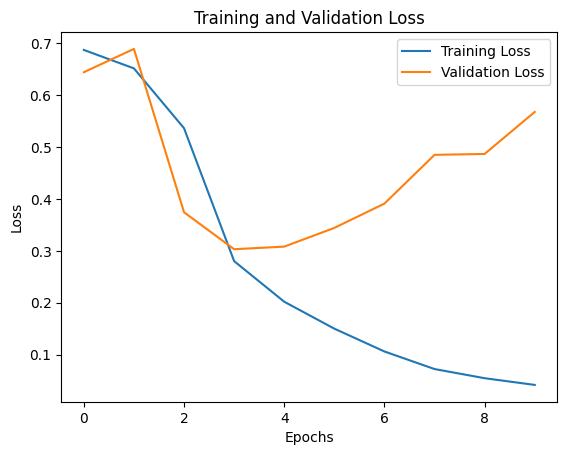

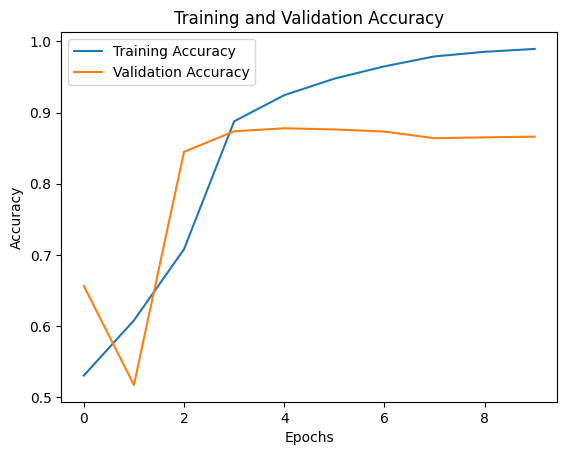

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8707 - loss: 0.5521
Test Loss: 0.5716058611869812
Test Accuracy: 0.8676999807357788


In [ ]:
# Example new reviews
new_reviews = [
    "This movie was absolutely fantastic! I loved it.",
    "The film was a waste of time. Completely boring.",
    "An average movie with decent performances."
]

# Preprocess the new reviews
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=100, padding='post', truncating='post')

# Predict sentiments
predictions = model.predict(new_padded)

# Display results
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred[0]:.2f})")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Review: This movie was absolutely fantastic! I loved it.
Predicted Sentiment: Positive (Confidence: 0.99)

Review: The film was a waste of time. Completely boring.
Predicted Sentiment: Negative (Confidence: 0.00)

Review: An average movie with decent performances.
Predicted Sentiment: Negative (Confidence: 0.05)



In [ ]:
# Save the trained model to disk
model.save('D:\\Mtech\\SEm_1\\Predictive_Data_Analysis\\Lab_Task_7\\sentiment_analysis_model.h5')
print("Model saved as sentiment_analysis_model.h5")

Model saved as sentiment_analysis_model.h5


In [ ]:

from tensorflow.keras.models import load_model
loaded_model = load_model('D:\\Mtech\\SEm_1\\Predictive_Data_Analysis\\Lab_Task_7\\sentiment_analysis_model.h5')


In [ ]:
# Example new reviews
new_reviews = [
    "The storyline was amazing and very engaging.",
    "I didn't like the acting; it was very dull.",
    "It was a fun and enjoyable watch for the weekend."
]

# Preprocess the new reviews
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=100, padding='post', truncating='post')

# Predict sentiments using the loaded model
predictions = loaded_model.predict(new_padded)

# Display results
for review, pred in zip(new_reviews, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred[0]:.2f})")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Review: The storyline was amazing and very engaging.
Predicted Sentiment: Positive (Confidence: 0.67)

Review: I didn't like the acting; it was very dull.
Predicted Sentiment: Negative (Confidence: 0.01)

Review: It was a fun and enjoyable watch for the weekend.
Predicted Sentiment: Positive (Confidence: 0.99)

